In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [2]:
df = pd.read_csv('Titanic-Dataset.csv',encoding= 'unicode_escape')

In [3]:
df.shape

(891, 13)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Unnamed: 12  0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,NaN
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,NaN


In [7]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [8]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Unnamed: 12
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,0.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,NaN
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,NaN


<Axes: ylabel='count'>

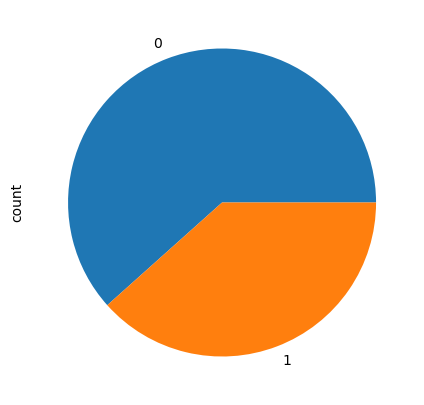

In [12]:
df['Survived'].value_counts().plot(kind='pie', figsize=(5,5))

<Axes: xlabel='Survived', ylabel='Age'>

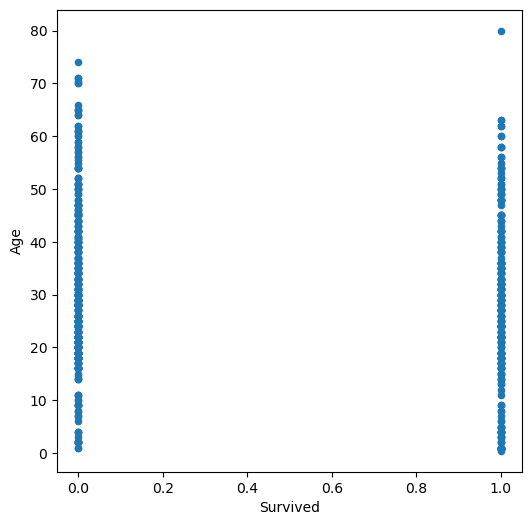

In [13]:
df.plot(kind='scatter', x='Survived', y='Age', figsize=(6,6))

In [14]:
df['Survived'].value_counts().keys()

Index([0, 1], dtype='int64', name='Survived')

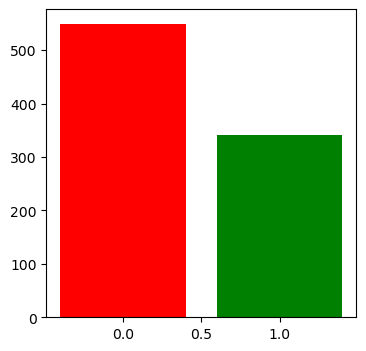

In [15]:
plt.figure(figsize=(4,4))
plt.bar(list(df['Survived'].value_counts().keys()), list(df['Survived'].value_counts()), color=["r","g"])
plt.show()

In [16]:
df['Pclass'].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

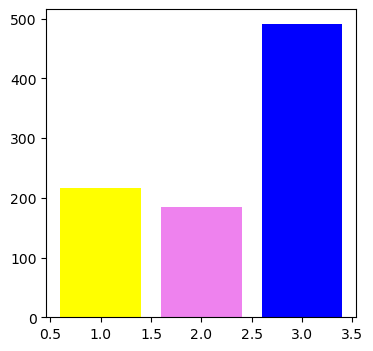

In [17]:
plt.figure(figsize=(4,4))
plt.bar(list(df['Pclass'].value_counts().keys()), list(df['Pclass'].value_counts()), color=["blue","yellow","violet"])
plt.show()

In [18]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

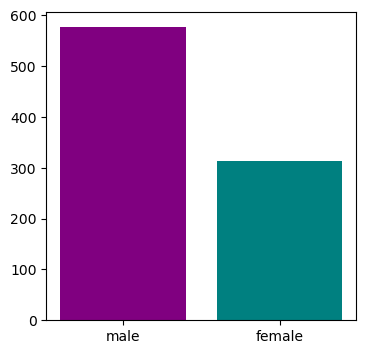

In [19]:
plt.figure(figsize=(4,4))
plt.bar(list(df['Sex'].value_counts().keys()), list(df['Sex'].value_counts()), color=["purple","teal",])
plt.show()

In [20]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Unnamed: 12    891
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

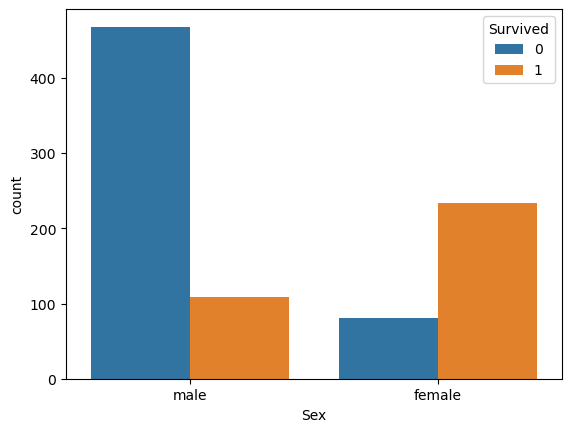

In [21]:
sns.countplot(x= df['Sex'] , hue = df['Survived'])

<Axes: xlabel='Survived', ylabel='count'>

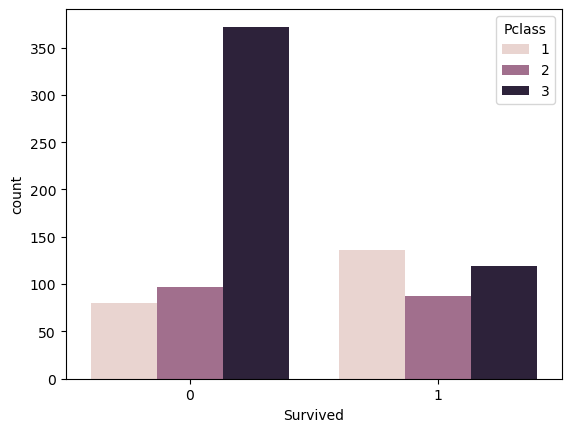

In [22]:
sns.countplot(x = df['Survived'] , hue = df['Pclass'])

In [23]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Unnamed: 12    891
dtype: int64

In [24]:
df.replace({'Sex':{'male' : 0 , 'female' : 1} }, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,NaN


In [25]:
x = df[['Pclass' , 'Sex']]
y = df['Survived']

In [26]:
x , y

(     Pclass  Sex
 0         3    0
 1         1    1
 2         3    1
 3         1    1
 4         3    0
 ..      ...  ...
 886       2    0
 887       1    1
 888       3    1
 889       1    0
 890       3    0
 
 [891 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [27]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
print (x.shape, x_train.shape, x_test.shape)

(891, 2) (712, 2) (179, 2)


In [29]:
ML= LogisticRegression()
ML.fit(x_train, y_train)

LogisticRegression()

In [30]:
x_test_prediction = ML.predict(x_test)
print(x_test_prediction)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [31]:
print(y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [32]:
x_train_prediction= ML.predict(x_train)
print(x_train_prediction)

[1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 

In [33]:
print(y_train)

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64


In [34]:
train_accuracy= accuracy_score(x_train_prediction, y_train)
test_accuracy=accuracy_score(x_train_prediction , y_train)
test_accuracy = accuracy_score(x_test_prediction , y_test)
print("Accuracy scores of training and test data are " , train_accuracy , "and", test_accuracy , "respectively")

Accuracy scores of training and test data are  0.7865168539325843 and 0.7877094972067039 respectively
